# Ciencia de Datos
## 2º Cuatrimestre de 2017

## Módulo 5 - Inferencia Bayesiana

## Integrantes:

- Fernández, Esteban - 691/12 - esteban.pmf@gmail.com
- Beccar García, Augusto - 267/13 - abg101@gmail.com
- Fadel, Uriel - 104/14 - urielfadel@gmail.com


## Introducción

En el presente trabajo estudiaremos interpretación estadística distinta a la clásica. Esta es la inferencia Bayesiana. Mientras que en la estadística clásica partimos de una hipótesis sin previo conocimiento del contexto en el que se aplica para luego calcular una probabilidad de una observación dada esa hipótesis, en la estadística Bayesiana partimos de los datos y queremos la probabilidad de la hipótesis dada esa evidencia. 

Dicha probabilidad llamada a posterior se calcula a partir de la verisimilitud de los datos dada la hipótesis (probabilidad condicional de datos dada hipótesis) ponderada por el conocimiento previo que disponemos acerca de esa hipótesis, estipulado bajo la forma de una función de distribución probabilistica sujeto a ciertos parámetros. De esta manera se puede entrenar un modelo a partir de de las suceivas evidencias que se van encontrando, variando la probabilidad dicha hipótesis y prediciendo el resultado de incorporar una nueva observación.

En nuestro trabajo analizaremos la probabilidad de que una moneda se encuentra cargada cuando la muestra observada indica que todas las tiradas resultaron ser caras. 

# Importación de librarías

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.io
import scipy.stats
import math
import collections
from random import choice
import pymc3 as pm
from pymc3 import Binomial, Beta, Model
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Ejercicio 1.

Partimos de dos modelos con una distribución asociada a la distribución Beta(50,50) y Beta(1,1) (probabilidad uniforme). Dichos modelos se corresponden a la variable aleatoria theta y theta1 respectivamente. En el primer caso tenemos un conocimiento acerca de la distribuciónd de probabilidad de que una moneda se encuentre cargada. La distribución Beta(50,50) se aproxima a una normal cuya media es 0.5. Esto indica que la probabilidad de el resultado de una tirada de dados sea cara es igualmente probable a la probabilidad de que salga seca. Esto significa que es más probable que la moneda no se encuentre cargada que es lo que en genral suponemos en el mundo real.

Mientras que la distribución Beta (1,1) es la distribución uniforme asociada a la variable aletaoria theta1 que representa la probabilidad de que el dado salga cara. Por lo tanto es igualmente probable que la probabilidad de que la moneda esté cargada  a que no esté lo que refleja un desconocimiento a priori.

En este caso se arrojan 6 monedas y las 6 son caras. Esta nuestra observación.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:01<00:00, 1470.07it/s]


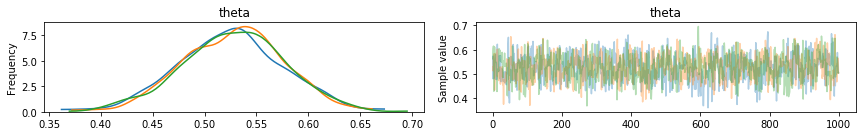

In [13]:

with pm.Model() as coin_model:
    prior = Beta('theta',50,50)
    posterior = Binomial('obs_faces', n=6, p=prior, observed = 6)
    #posterior = likelihood*prior
    
    trace = pm.sampling.sample(1000, njobs = 3)
    pm.traceplot(trace)



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:01<00:00, 1325.85it/s]


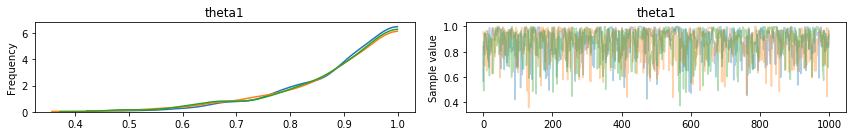

In [15]:
with Model() as coin_model1:
    prior1 = Beta('theta1',1,1)
    posterior1 = Binomial('obs_faces1', 6, prior1,observed = 6)
    #posterior1 = likelihood1*prior1
    
    trace1 = pm.sampling.sample(1000, njobs = 3)
    pm.traceplot(trace1)     

Vemos que en el primer caso donde tenemos una distribución que tiende a la normal indicando que es mas probable que la moneda no esté cargada, la observación de las 6 monedas que resultaron ser 6 caras redundó en un corrimiento de la media hacia el 0.5 por lo que no afectó en gran medida a la hipótesis aunque ya la media corresponda a una moneda cargada (pues la probabilidad de que salga cara es mayor a la probabilida de que salga seca).

Por otra parte, el segundo modelo que partía de un desconocimiento de la hipótesis y que era igualmente probable que la moenda esté cargada a que no lo esté presenta un mayor impacto del dato observado en la hipótesis a posteriori siendo considerablmente mayor la probabilidad de que sí se encuentra cargada la moneda.

# Ejercicio 2

Para mejor análisis del ejercicio anterior calculamos la moda de la hipótesis posterior de cada modelo y su media.

In [19]:
map_coin_model = pm.find_MAP(model = coin_model)
print (map_coin_model)
pm.summary(trace)

logp = -2.0846, ||grad|| = 3: 100%|██████████| 6/6 [00:00<00:00, 1730.44it/s]

{'theta_logodds__': array(0.1155128866982778), 'theta': array(0.5288461537406147)}

theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.527            0.049            0.001            [0.431, 0.622]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.430          0.493          0.528          0.560          0.621



In [18]:
map_coin_model1 = pm.find_MAP(model = coin_model1)
print (map_coin_model1)
pm.summary(trace1)

logp = -0.0023631, ||grad|| = 0.0023627: 100%|██████████| 20/20 [00:00<00:00, 2237.14it/s]  

{'theta1_logodds__': array(13.385080233683778), 'theta1': array(0.9999984620831801)}

theta1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.876            0.111            0.003            [0.649, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.596          0.821          0.910          0.962          0.996



Vemos que es un poco mayor a 0.5 la máxima frecuencia con la que en las muestras la moneda se encuentra cargada en el modelo donde partimos de una distribución conocida por nosotors de antemano mientras que en el segundo caso este valor tiende a uno (es decir, mayor cantidad de veces en las que la muestra arrojó todas caras) con una media de 0.876, sugiriendo que la probabilidad de obtener cara es bastante mayor que la de no obtenerla.

# Ejercicio 3

Ahora realizamos una tirada más dado el modelo y observamos los resultados.

In [22]:

trace_ej3 = pm.sampling.sample_ppc(trace, 10, model = coin_model)
print (trace_ej3)

100%|██████████| 10/10 [00:00<00:00, 2225.80it/s]

{'obs_faces': array([3, 2, 2, 3, 3, 2, 1, 3, 5, 4])}


In [23]:
trace_ej3_1 = pm.sampling.sample_ppc(trace1, 10, model = coin_model1)
print (trace_ej3_1)

100%|██████████| 10/10 [00:00<00:00, 2453.96it/s]

{'obs_faces1': array([6, 6, 6, 5, 5, 6, 5, 5, 4, 6])}


Se observa que en el primer caso dond el modelo posterir calculado en el ejercicio anterior es levemente favorable que la moneda esté cargada arroja resultados que tienden a esa equiprobabilidad (cada elemente del array es la cantidad de veces que resulta ser cara en 6 tiradas) mientras que en el segundo casi siempre todas las tiradas arrojan cara (5 de 10 veces todas son caras) prediciendo así una moneda pesada dado el modelo posterior basado en el desconocimiento del problema.

# Ejercicio 4
Realizamos lo mismo para 20 de 20 y 3 de 3 caras.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:01<00:00, 1427.08it/s]


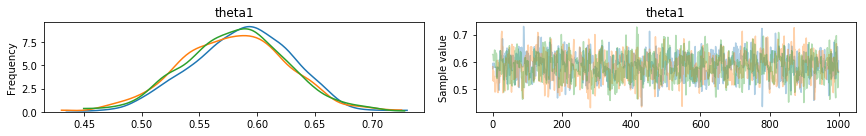

In [24]:
with Model() as coin_model_20:
    prior_20 = Beta('theta1',50,50)
    posterior_20 = Binomial('obs_faces_20', n=20, p=prior_20, observed = 20)
    #posterior = likelihood*prior
    
    trace_20 = pm.sampling.sample(1000, njobs = 3)
    pm.traceplot(trace_20)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:01<00:00, 1257.22it/s]


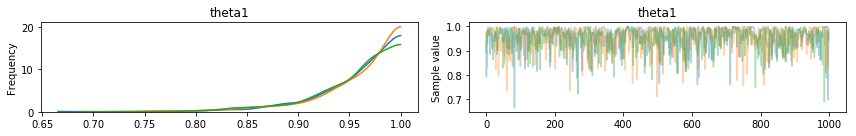

In [25]:
with Model() as coin_model_20_1:
    prior_20_1 = Beta('theta1',1,1)
    posterior_20_1 = Binomial('obs_faces_20_1', n=20, p=prior_20_1, observed = 20)
    #posterior = likelihood*prior
    
    trace_20_1 = pm.sampling.sample(1000, njobs = 3)
    pm.traceplot(trace_20_1)

In [31]:
map_coin_model_20 = pm.find_MAP(model = coin_model_20)
print (map_coin_model_20)
pm.summary(trace_20)

logp = -11.789, ||grad|| = 10: 100%|██████████| 6/6 [00:00<00:00, 1727.47it/s]

{'theta1_logodds__': array(0.34228619837756463), 'theta1': array(0.5847457607428355)}

theta1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.583            0.045            0.001            [0.496, 0.667]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.495          0.552          0.584          0.613          0.666



In [32]:
map_coin_model_20_1 = pm.find_MAP(model = coin_model_20_1)
print (map_coin_model_20_1)
pm.summary(trace_20_1)

logp = -7.0849e-06, ||grad|| = 7.6896e-06: 100%|██████████| 22/22 [00:00<00:00, 1862.18it/s]  

{'theta1_logodds__': array(14.771376390280464), 'theta1': array(0.9999996155210419)}

theta1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.955            0.044            0.001            [0.864, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.835          0.937          0.968          0.987          0.999



In [34]:

trace_ej3_20 = pm.sampling.sample_ppc(trace_20, 10, model = coin_model_20)
print (trace_ej3_20)

100%|██████████| 10/10 [00:00<00:00, 1830.93it/s]

{'obs_faces_20': array([11, 11, 12,  8, 14, 11, 13, 12, 11,  7])}


In [36]:

trace_ej3_20_1 = pm.sampling.sample_ppc(trace_20_1, 10, model = coin_model_20_1)
print (trace_ej3_20_1)

100%|██████████| 10/10 [00:00<00:00, 2185.79it/s]

{'obs_faces_20_1': array([19, 19, 20, 19, 20, 20, 20, 20, 20, 19])}


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:01<00:00, 1460.76it/s]


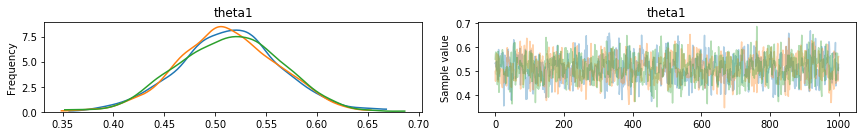

In [8]:
with Model() as coin_model_3:
    prior_3 = Beta('theta1',50,50)
    posterior_3 = Binomial('obs_faces_3', n=3, p=prior_3, observed =3)
   
    
    trace_3 = pm.sampling.sample(1000, njobs = 3)
    pm.traceplot(trace_3)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:01<00:00, 1465.60it/s]


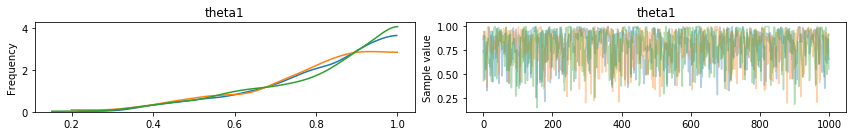

In [9]:
with Model() as coin_model_3_1:
    prior_3_1 = Beta('theta1',1,1)
    posterior_3_1 = Binomial('obs_faces_3', n=3, p=prior_3_1, observed = 3)
   
    
    trace_3_1 = pm.sampling.sample(1000, njobs = 3)
    pm.traceplot(trace_3_1)

In [10]:
map_coin_model_3 = pm.find_MAP(model = coin_model_3)
print (map_coin_model_3)
pm.summary(trace_3)

logp = -0.0051492, ||grad|| = 1.5: 100%|██████████| 6/6 [00:00<00:00, 1653.80it/s]

{'theta1_logodds__': array(0.05942342044808725), 'theta1': array(0.5148514851428415)}

theta1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.513            0.049            0.001            [0.417, 0.608]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.416          0.480          0.513          0.545          0.608



In [11]:
map_coin_model_3_1 = pm.find_MAP(model = coin_model_3_1)
print (map_coin_model_3_1)
pm.summary(trace_3_1)

logp = -0.0011816, ||grad|| = 0.0011814: 100%|██████████| 19/19 [00:00<00:00, 2278.34it/s]  

{'theta1_logodds__': array(12.691930611010052), 'theta1': array(0.999996924163579)}

theta1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.795            0.166            0.005            [0.458, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.404          0.700          0.837          0.926          0.994



In [12]:

trace_ej3_3 = pm.sampling.sample_ppc(trace_3, 10, model = coin_model_3)
print (trace_ej3_3)

100%|██████████| 10/10 [00:00<00:00, 1314.87it/s]

{'obs_faces_3': array([2, 3, 1, 3, 2, 1, 1, 3, 0, 1])}


In [13]:
trace_ej3_3_1 = pm.sampling.sample_ppc(trace_3_1, 10, model = coin_model_3_1)
print (trace_ej3_3_1)

100%|██████████| 10/10 [00:00<00:00, 3088.36it/s]

{'obs_faces_3': array([0, 2, 1, 3, 3, 3, 3, 3, 2, 2])}


Se puede apreciar que la tirada de más monedas donde todas arrojan cara tiende a incrementar la media del prior con Beta (50,50) comparado con tirar menos dados ya que ahora tenemos más datos que parecen indicar que la moneda se encuentre cargada. La media de theta es de 0.58 en este caso compardo con 0.54 de las 6 moendas arrojadas en el ejercicio anterior. Esto indica que hay más probabilidad aun que antes de que la moneda este cargada. 

En el caso del prior uniforme , dicho desconocimiento de la distribución de probabilidad de la carga de la moneda lleva al modelo a creer casi tajantemente que la moneda sí lo esta, con una media de theta > 0.9 (es decir, 90% de chances de que salga cara, sumamente cargada). Esto contrasta con el pirmero caso en el que nuestro conocimiento acerca de que lo más esperado en el mundo real es que las monedas sean equilibradas lleva a la distribución de theta a no moverse tanto de su forma original. Infiere que la moneda es pesada (y por eso la media de que caiga cara es de 0.54) pero con una probabilidad mucho menor dada la rareza de tal evento que asumimos como conocimiento previo.

# Ejercicio 5


En base a nuestra experiencia creemos que si en 7 tiradas salen 7 caras entonces la moneda está cargada.

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 4.9892:   2%|▏         | 3407/200000 [00:00<00:11, 16991.35it/s]
Convergence archived at 4600
Interrupted at 4,600 [2%]: Average Loss = 5.3452
100%|██████████| 1500/1500 [00:00<00:00, 1681.44it/s]

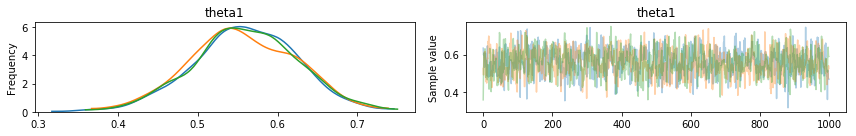

In [139]:
with Model() as coin_model_7:
    prior_7 = Beta('theta1',25,25)
    posterior_7 = Binomial('obs_faces', n=7, p=prior_7, observed = 7)
    #posterior = likelihood*prior
    
    trace_7 = pm.sampling.sample(1000, njobs = 3)
    pm.traceplot(trace_7)
    
    

In [140]:
pm.summary(trace_7)


theta1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.558            0.065            0.002            [0.428, 0.683]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.428          0.516          0.558          0.603          0.683



Con alpha = 25, la distribución de theta luego de observar 7 caras seguidas vira hacia la derecha estableciendo una media de la probabilidad de que la moneda arroje cara en 0.54, lo que nos parece suficiente para ver que se encuentra equilibrada.